# Майнор по Анализу Данных, Группа ИАД-2
## 25/01/2017 Спасательная операция: Pandas, Matplotlib, NumPy. 

Так как на предыдущем майноре вам не успели рассказать про `рandas`, `matplotlib`, `numpy`, то придется вас спасать.

**Дисклеймер**<br/>
Мы очень ограничены во времени и естественно стать гуру `pandas`, `numpy`, `matplotlib` и других модулей за такой краткий срок у вас не получится. Этому может способствовать только постоянная практика: наши домашние задания, онлайн курсы по анализу данных в `python`, [видео лекции](http://www.dataschool.io/easier-data-analysis-with-pandas/), ваша курсовая работа (?). Я постараюсь изложить основную суть. Для всего, что я не успею - можно спрашивать меня, google или [RTFM](http://pandas.pydata.org/).

Начнем.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16,8)

# NumPy

NumPy (short for Numerical Python) - это эффективная библиотека для работы с числовыми массивами и матрицами.

Нам с вами очень важно уметь работать с этими структурами быстро по крайней мере по двум причинам:
* Данные любой природы в подавляющем числе случаем можно преставить в виде набора чисел (изображения, тексты, видео-клипы, простые табличные данные)
* Этих данных очень много и надо бы уметь их быстро обрабатывать, анализировать и модифицировать ( желательно избегая вложенных циклов, большого набора условных операторов!)

Основа `numpy` - это `array` (массивы). В отличие от списков или кортежей, элементы массива должны быть одного типа. Такая жертва оправдывает скорость и низкие затраты на хранение информации, которую дает numpy. Массивы же, в свою очередь, используются во многих других библиотеках `python`  для анализа данных.

## Массивы

### Создание массива

Массив можно создать из списка.

In [13]:
arr = np.array([1,3,4,7,12])
arr

array([ 1,  3,  4,  7, 12])

In [14]:
arr = np.array([1,3,4,7,12.0])
arr

array([  1.,   3.,   4.,   7.,  12.])

In [15]:
arr = np.array([1,3,4,'7',12.0])
arr

array(['1', '3', '4', '7', '12.0'], 
      dtype='|S21')

Но наиболее распространены создания "с нуля"

In [16]:
arr = np.arange(0, 12, 0.7) # расширение функции range()
arr

array([  0. ,   0.7,   1.4,   2.1,   2.8,   3.5,   4.2,   4.9,   5.6,
         6.3,   7. ,   7.7,   8.4,   9.1,   9.8,  10.5,  11.2,  11.9])

In [17]:
arr = np.linspace(0, 12, 20) # равномерно распределенные 20 чисел от 0 до 12
arr

array([  0.        ,   0.63157895,   1.26315789,   1.89473684,
         2.52631579,   3.15789474,   3.78947368,   4.42105263,
         5.05263158,   5.68421053,   6.31578947,   6.94736842,
         7.57894737,   8.21052632,   8.84210526,   9.47368421,
        10.10526316,  10.73684211,  11.36842105,  12.        ])

In [18]:
# Массив из "1"
arr = np.ones(7)
print arr
arr = np.ones(7, dtype=int)
print arr

[ 1.  1.  1.  1.  1.  1.  1.]
[1 1 1 1 1 1 1]


In [19]:
# Массив из "0"
arr = np.zeros(7)

In [20]:
# Массив из чего хотите
arr = np.full(7, np.exp(1), )
arr

array([ 2.71828183,  2.71828183,  2.71828183,  2.71828183,  2.71828183,
        2.71828183,  2.71828183])

In [21]:
?np.full

### Свойства массива

In [24]:
A = np.array([[3, 1, 4], [1, 5, 9], [2, 6, 5], [4, 1, 1]])
A

array([[3, 1, 4],
       [1, 5, 9],
       [2, 6, 5],
       [4, 1, 1]])

In [23]:
print A.shape
print A.size
print A.ndim

(4, 3)
12
2


Форму массива (`shape`) можно менять, но так, чтобы это согласовывалось с его размером (`size`) 

In [25]:
A = A.reshape((6,2))
A

array([[3, 1],
       [4, 1],
       [5, 9],
       [2, 6],
       [5, 4],
       [1, 1]])

In [33]:
A = A.flatten()
print A
print A.shape

#!!!
# Это не тоже самое, что A = A.reshape((1, 12))

A = A.reshape((1,12))
print A
print A.shape

[3 1 4 1 5 9 2 6 5 4 1 1]
(12,)
[[3 1 4 1 5 9 2 6 5 4 1 1]]
(1, 12)


In [36]:
A = A.reshape((4, -1)) 
A

# -1 как бы означает, "сделай первую размерность равную 3, 
# а все остальное запихни во вторую, если получится

array([[3, 1, 4],
       [1, 5, 9],
       [2, 6, 5],
       [4, 1, 1]])

In [38]:
print A
print ' '
print A.T # Транспонирование матрицы

[[3 1 4]
 [1 5 9]
 [2 6 5]
 [4 1 1]]
 
[[3 1 2 4]
 [1 5 6 1]
 [4 9 5 1]]


###  Индексация

Довольно стандартная и интуитивно понятная

In [39]:
arr = np.arange(0, 19, 3)
arr

array([ 0,  3,  6,  9, 12, 15, 18])

In [40]:
arr[3]

9

In [41]:
arr[:3]

array([0, 3, 6])

In [42]:
arr[3:5]

array([ 9, 12])

In [43]:
arr[::3] #?!

array([ 0,  9, 18])

In [44]:
arr[-2:] #?!

array([15, 18])

**Задание**<br/>
Догадайтесь, как вывести массив в обратном порядке?

In [45]:
## Your code here
arr[::-1]

array([18, 15, 12,  9,  6,  3,  0])

In [46]:
print arr>10
print arr[arr>10]

[False False False False  True  True  True]
[12 15 18]


In [47]:
arr[[1,3,2]]

array([3, 9, 6])

На многомерные массивы (матрицы) все распространяется точно также.

In [48]:
A = np.random.randint(0, 20, (5,6))
A

array([[14,  7,  8,  9,  2, 17],
       [ 3,  5,  6, 11,  3, 18],
       [ 9,  1, 13,  1,  6, 14],
       [ 7,  4,  0,  0,  0, 10],
       [19, 14, 16, 12,  8, 16]])

In [49]:
# Небольшое дополнение
print A[:, 2]
print A[2, :]

[ 8  6 13  0 16]
[ 9  1 13  1  6 14]


In [50]:
A[A>5]

array([14,  7,  8,  9, 17,  6, 11, 18,  9, 13,  6, 14,  7, 10, 19, 14, 16,
       12,  8, 16])

**Задание**
Задайте матрица размера `(5,6)` c числами от 5 до 34, такую что на каждой строчке числа поледовательно возрастают на 1. Первая строчка начинается с 5 и заканчивается 10, вторая начинается с 11 и тп. 

In [54]:
## Your code here
a = np.arange(5, 35)
a = a.reshape((5,-1))
a

array([[ 5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22],
       [23, 24, 25, 26, 27, 28],
       [29, 30, 31, 32, 33, 34]])

###  Склейка массивов

In [56]:
a = np.random.randint(0, 10, (2, 5))
b = np.random.randint(0, 10, (2, 5))

print a
print ' '
print b

[[4 9 6 9 1]
 [5 5 6 3 5]]
 
[[9 6 8 5 2]
 [0 2 6 2 1]]


In [57]:
A = np.r_[a,b]
A

array([[4, 9, 6, 9, 1],
       [5, 5, 6, 3, 5],
       [9, 6, 8, 5, 2],
       [0, 2, 6, 2, 1]])

In [58]:
A = np.concatenate((a,b), axis=0)
A

array([[4, 9, 6, 9, 1],
       [5, 5, 6, 3, 5],
       [9, 6, 8, 5, 2],
       [0, 2, 6, 2, 1]])

In [59]:
A = np.c_[a,b]
A

array([[4, 9, 6, 9, 1, 9, 6, 8, 5, 2],
       [5, 5, 6, 3, 5, 0, 2, 6, 2, 1]])

In [60]:
A = np.concatenate((a,b), axis=1)
A

array([[4, 9, 6, 9, 1, 9, 6, 8, 5, 2],
       [5, 5, 6, 3, 5, 0, 2, 6, 2, 1]])

### Операции и функции на массивах

Тут все тоже довольно просто

In [61]:
arr = np.arange(1, 6, dtype=float)
arr

array([ 1.,  2.,  3.,  4.,  5.])

In [62]:
1/arr

array([ 1.        ,  0.5       ,  0.33333333,  0.25      ,  0.2       ])

In [63]:
arr * 2

array([  2.,   4.,   6.,   8.,  10.])

In [64]:
arr // 2

array([ 0.,  1.,  1.,  2.,  2.])

In [65]:
bar = np.arange(6,1,-1)
bar

array([6, 5, 4, 3, 2])

In [66]:
arr + bar

array([ 7.,  7.,  7.,  7.,  7.])

In [67]:
arr * bar

array([  6.,  10.,  12.,  12.,  10.])

In [68]:
arr ** bar

array([  1.,  32.,  81.,  64.,  25.])

In [69]:
# Матричное умножение (скалярное произведение)
arr.dot(bar)

50.0

В `numpy` реализовано много математических функций

In [70]:
np.log(arr)

array([ 0.        ,  0.69314718,  1.09861229,  1.38629436,  1.60943791])

In [71]:
np.sqrt(arr)

array([ 1.        ,  1.41421356,  1.73205081,  2.        ,  2.23606798])

**Задание**<br/>
Задайте два случайных массива $a$ и $b$ одинаковой длины. 

Вычислите следующие расстояния между массивами:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}$$


In [77]:
a = np.random.rand(5)
b = np.random.rand(5)

# Евклидово расстояние
c = a-b
euclid = np.sqrt(c.dot(c))
print euclid

euclid = np.sqrt(((a - b) ** 2).sum())
print euclid

# Расстояние таксиста
manhat = abs(a-b).sum()
print manhat

# Косунус - самиии


1.02390982409
1.02390982409
1.99847446939


**Задание**<br/>
Выполните загрузку данных, как указано ниже (может занять время).

Выберите случайную строчку из данных. Найдите другую "ближайшую" (по евклидовому расстоянию) к ней строчку и выведите её.

In [20]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [21]:
X = faces.data

In [22]:
X.shape

(400, 4096)

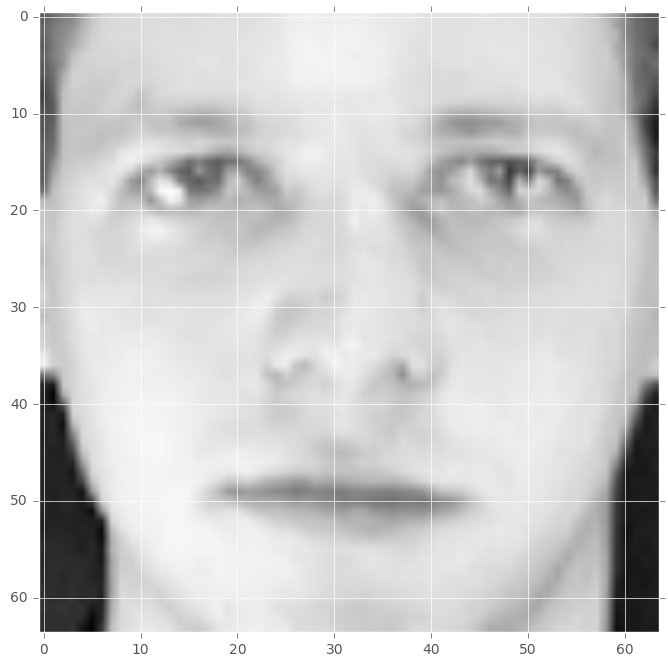

In [23]:
x = X[0, :].reshape(64,64)

plt.imshow(x, cmap=plt.cm.Greys_r)

In [44]:
# Выбираем случайную фотку
idx = np.random.randint(0, X.shape[0])

x = X[idx, :]

# Считaем евклидово расстояние..
d = X - x

In [45]:
print x.shape
print X.shape

(4096,)
(400, 4096)


In [46]:
euclidean = (d ** 2).sum(axis=1)

In [47]:
euclidean.shape

(400,)

In [48]:
print np.sort(euclidean)[:2]

[  0.          22.74522018]


In [49]:
# Ближайшая, отличная от исходной фотка находится на позиции...
idx = np.argsort(euclidean)[1]
print idx

324


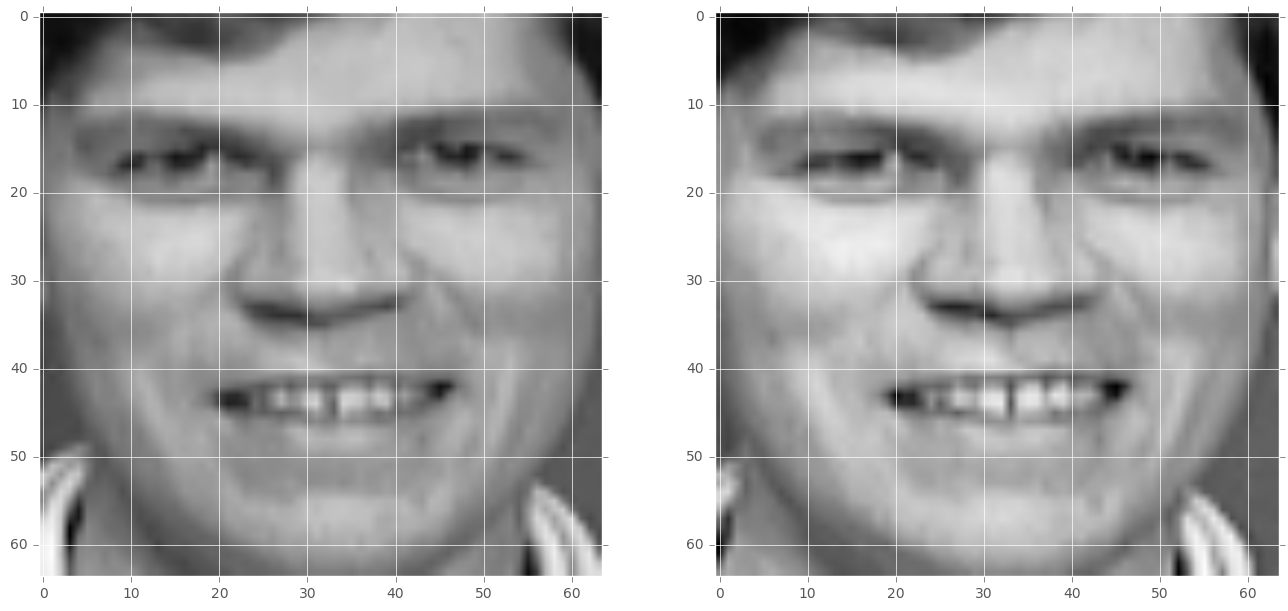

In [50]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(x.reshape(64,64), cmap=plt.cm.Greys_r)
ax[1].imshow(X[idx,:].reshape(64,64), cmap=plt.cm.Greys_r)


### Аггрегация

Массивы можно аггрегировать - считать среднее значение, медиану, моду, максимум, минимум, сумму и тп

In [26]:
A = np.random.rand(5,6)
A

array([[ 0.36575967,  0.37234193,  0.14970974,  0.9461111 ,  0.53290026,
         0.31879417],
       [ 0.56842278,  0.97844321,  0.78435445,  0.6571982 ,  0.56716522,
         0.91125909],
       [ 0.73045639,  0.0338118 ,  0.35913168,  0.13991442,  0.39521841,
         0.36330705],
       [ 0.91820868,  0.16336231,  0.46958397,  0.36622901,  0.70162311,
         0.46877314],
       [ 0.59470251,  0.90434144,  0.04637567,  0.16406337,  0.44744451,
         0.79758306]])

In [30]:
print A.mean(axis=0) # среднее по столбцам
print 
print A.mean(axis=1) # среднее по строкам

[ 0.63551001  0.49046014  0.3618311   0.45470322  0.5288703   0.5719433 ]

[ 0.44760281  0.74447383  0.33697329  0.51463004  0.49241843]


In [89]:
arr = np.random.rand(11)
arr

array([ 0.13322254,  0.57411707,  0.26534129,  0.72223775,  0.78302364,
        0.40246901,  0.30582463,  0.43780534,  0.10431622,  0.93445869,
        0.46749456])

In [90]:
print np.mean(arr)
print arr.mean()

0.466391885991
0.466391885991


In [91]:
arr.sum()

5.1303107458965549

In [92]:
print 'максимальное значение %.4f находится на %d позиции' % (arr.max(), arr.argmax())
# аналогично argmax, есть argmin и argsort

максимальное значение 0.9345 находится на 9 позиции


In [93]:
np.median(arr)

0.43780534034250507

In [96]:
np.sort(arr)

array([ 0.10431622,  0.13322254,  0.26534129,  0.30582463,  0.40246901,
        0.43780534,  0.46749456,  0.57411707,  0.72223775,  0.78302364,
        0.93445869])

In [97]:
np.percentile(arr, [10, 15, 85])

array([ 0.13322254,  0.19928192,  0.7526307 ])

**Задание**<br/>
Сгенерируйте такой случайный вектор (`np.random.rand()`) длины 10, что сумма его элементов равна 2.

In [105]:
## Your code here
a = np.random.rand(10)
res = 2. * a / a.sum()

res.sum()

2.0

**Задание**<br/>
Сгенерируйте случайный вектор (`np.random.rand()`) длины 100. Выполните такое преобразование массива, что 
* Максимальному элементу(-ам) соответствовало число 1
* Минимальному элементу(-ам) соответствовало число 0
* Остальные элементы находились на интервале 0-1 с сохранением порядка

In [106]:
## Your code here
a = np.random.rand(100)
res = (a - a.min()) / (a.max() - a.min())

In [107]:
print res.min()
print res.max()

0.0
1.0


**Задание**<br/>
Сгенерируйте случайный вектор длины 20 из целых чисел на интервале [0,50]. Оставьте в нем только те элементы что меньше 5 персентиля и больше 95 персентиля

In [ ]:
## Your code here


Что касается матриц - то в них все примерно тоже самое.

In [ ]:
A = np.random.rand(3,5)
A

In [ ]:
A.mean()

**Задание**<br/>
Сгенерируйте случайную матрицу размера $5 \times 6$ из целых чисел на интервале [0,50]. Выведите столбец с содержащий максимальное значение во всей матрице.

In [ ]:
## Your code here

### Пропущенные значения

В `numpy` есть специальные обозначения для бесконечности и пропущенных значений.

В реальном мире приходится работать с очень "грязными" данными и частенько бывает, что какие-то измерения, значения признаков и тп просто отсутствуют. К этому надо быть готовым

In [3]:
np.log(0)

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


-inf

In [4]:
np.log(-1)

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


nan

In [5]:
np.nan # not a number

nan

In [6]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan
arr

array([ 0.74610106,         nan,  0.82777625,  0.31485978,         nan,
        0.09422482,  0.34026536,         nan,         nan,  0.17418014])

In [8]:
# проверяем, является ли значение пропущенным
is_nan = np.isnan(arr)
is_nan

array([False,  True, False, False,  True, False, False,  True,  True, False], dtype=bool)

In [9]:
# проверяем, есть ли хотя бы одно пропущенное
np.any(is_nan)

True

In [10]:
# проверяем, есть ли хотя бы одно пропущенное
np.all(is_nan)

False

Аггрегация массивов с пропущенными значениями может выполняться без учета np.nan

In [12]:
print np.nanmean(arr)
print np.mean(arr)

0.416234568324
nan


In [16]:
np.nan / 1

nan

**Задание**<br/>
Замените все пропущенные значение средним

In [18]:
idx = np.isnan(arr)
arr[idx] = np.nanmean(arr)

In [19]:
arr

array([ 0.74610106,  0.41623457,  0.82777625,  0.31485978,  0.41623457,
        0.09422482,  0.34026536,  0.41623457,  0.41623457,  0.17418014])

### Линейная регрессия (Пока бездумно)

Загрузите [файл 1](https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv?dl=0) и [файл 2](https://www.dropbox.com/s/f87gm612o144emx/tutorial_dataset_2.csv?dl=0) в папку с тетрадкой. С помощью функции `loadtxt` в модуле `numpy` загрузите табличные данные одного из файлов. Присвойте y = D[:,0] а X = D[:, 1:].

Сейчас мы воспользуемся одной магической формулой и построим модель линейной регрессии. Откуда эта формула берется мы узнаем на следующих занятиях.

Модель линейной регрессии в матричном виде выглядит так: $\hat{y} = X\hat{\beta}$, где

$$ \hat{\beta} = (X^T X)^{-1} X^T y $$
Остатки модели рассчитываются как
$$ \text{res} = y - \hat{y} $$

Итак, еще раз:

1. Загрузите данные
2. Оцените веса $\beta$ с помощью формулы
3. Постройте график, на котором по оси Y: остатки, а по оси X: $\hat{y}$

In [62]:
# load data
D = np.loadtxt('tutorial_dataset_2.csv', 
               skiprows=1, 
               delimiter=',')

In [63]:
D.shape

(2209, 6)

In [64]:
y = D[:, 0]
X = D[:, 1:]

In [66]:
# Теперь правильно примените формулу выше
Beta = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(y)
Beta

array([  6.85976194e-04,   1.17459428e+00,   1.08903184e+00,
         8.87441294e-01,   1.00928516e+00])

In [67]:
y_hat = X.dot(Beta)

In [68]:
res = y - y_hat

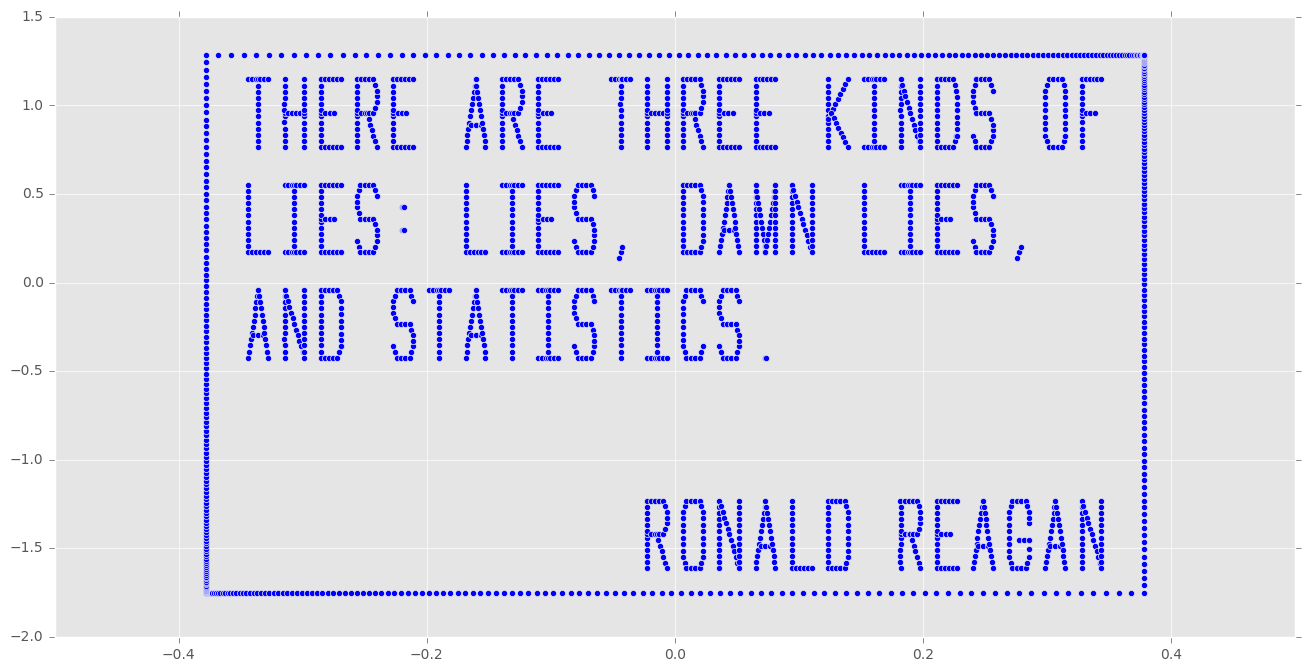

In [69]:
plt.scatter(y_hat, res)

# Pandas
## Основные структуры

Модуль `pandas` существенно упрощает исследование табличных данных в `python`. Работа в нем во многом напоминает работу с таблицами в SQL с тем отличием, что в `pandas` ~~тебе не хочется рвать волосы на голове~~ это делать гораздо удобнее, и в нем заложены некоторые дополнительные инструменты по работе с данными.

### Series

Основными структурами являются `Series` и `DataFrame`. <br/>
`Series` – это проиндексированный одномерный массив значений. Он похож на простой словарь типа `dict`, где имя элемента будет соответствовать индексу, а значение – значению записи.

Задать `Series` можно многими способами, например с помощью массива:

In [70]:
ser = pd.Series(np.random.rand(5))

In [71]:
ser

0    0.095159
1    0.544860
2    0.624966
3    0.719583
4    0.840589
dtype: float64

Колонка слева - это (строчный) индекс - некоторая нумерация записанных значений

In [72]:
ser.index

RangeIndex(start=0, stop=5, step=1)

In [73]:
ser.values

array([ 0.09515902,  0.54485963,  0.62496629,  0.7195834 ,  0.8405891 ])

In [74]:
# Достучаться до одного значения можно так
ser[1]

0.54485962580090408

In [75]:
# Можно так - это обычная интервальная индексация в python.
ser[0:2]

0    0.095159
1    0.544860
dtype: float64

Но про то, как улучше находить нужные вам значения - чуть позже.

Индексом может быть что угодно, например:

In [76]:
ser = pd.Series(np.random.rand(5), index=['m', 'i', 'n', 'o', 'r'])

In [77]:
ser

m    0.075117
i    0.830392
n    0.543025
o    0.561296
r    0.664521
dtype: float64

In [78]:
ser['r']

0.66452098477899268

In [79]:
ser['n':'o']

n    0.543025
o    0.561296
dtype: float64

### Индексация

Индексация в `pandas` может временами может показаться запутанной

In [80]:
ser = pd.Series(np.random.rand(5), index=[1,3,5,6,9])
ser

1    0.451602
3    0.064631
5    0.303191
6    0.870209
9    0.917350
dtype: float64

In [81]:
ser[3]

0.064630720574033407

In [82]:
ser[3:5] #?!

6    0.870209
9    0.917350
dtype: float64

Поэтому придумали разные операторы для индексирования, чтобы можно было явно указать, когда вы хотите использовать значения индекса, а когда позицию.

In [83]:
ser.loc[3:5, ]

3    0.064631
5    0.303191
dtype: float64

In [84]:
ser.loc[:, ]

1    0.451602
3    0.064631
5    0.303191
6    0.870209
9    0.917350
dtype: float64

In [85]:
idx = ser > 0.5
ser.loc[idx, ]

6    0.870209
9    0.917350
dtype: float64

In [86]:
idx

1    False
3    False
5    False
6     True
9     True
dtype: bool

In [88]:
ser

1    0.451602
3    0.064631
5    0.303191
6    0.870209
9    0.917350
dtype: float64

In [87]:
ser.iloc[3:5, ]

6    0.870209
9    0.917350
dtype: float64

Их же используйте для присваивания!!

In [89]:
idx = ser > 0.5
ser.loc[idx, ] = 0.5
ser

1    0.451602
3    0.064631
5    0.303191
6    0.500000
9    0.500000
dtype: float64

### DataFrame

`DataFrame` — это проиндексированный многомерный массив значений, соответственно каждый столбец `DataFrame`, является структурой `Series`. Индексирование в `DataFrame` ровно тоже, что и в `Series`, с тем отличием, что добавляется второе измерение.

In [90]:
df = pd.DataFrame(np.random.randn(10, 3),
                  index=range(10),
                  columns=['A', 'B', 'C'])

In [91]:
df.head() # выводит первые 5 (по-умолчанию) строк таблицы

,A,B,C
0,1.283762,0.515803,-0.752565
1,0.613519,-0.726500,-0.318252
2,0.262802,1.196804,0.661973
3,1.323470,-0.246536,0.348757
4,-0.511270,-0.918177,0.374558


In [92]:
print df.index
print df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
Index([u'A', u'B', u'C'], dtype='object')


In [93]:
df.loc[1:3, ['A', 'B']]

,A,B
1,0.613519,-0.726500
2,0.262802,1.196804
3,1.323470,-0.246536


In [94]:
df.iloc[1:3, 0:2]

,A,B
1,0.613519,-0.726500
2,0.262802,1.196804


`DataFrame` тоже можно транспонировать!

In [95]:
df.T

,0,1,2,3,4,5,6,7,8,9
A,1.283762,0.613519,0.262802,1.323470,-0.511270,0.525151,0.650805,0.360842,-0.057644,-0.221555
B,0.515803,-0.726500,1.196804,-0.246536,-0.918177,-0.126969,0.131791,-0.213805,1.403712,-0.684884
C,-0.752565,-0.318252,0.661973,0.348757,0.374558,1.111150,0.970014,-0.273131,-1.450807,1.684813


In [96]:
# Краткая описательная статистика
df.describe() 

# Кстати, это тоже DataFrame

,A,B,C
count,10.000000,10.000000,10.000000
mean,0.422988,0.033124,0.235651
std,0.596214,0.791463,0.943167
min,-0.511270,-0.918177,-1.450807
25%,0.022468,-0.575297,-0.306972
50%,0.442997,-0.170387,0.361657
75%,0.641483,0.419800,0.893004
max,1.323470,1.403712,1.684813


Аггрегация в DataFrame (по-умолчанию) происходит по стоблцам

In [101]:
df.mean()

A    0.422988
B    0.033124
C    0.235651
dtype: float64

In [98]:
df.A.mean()

0.42298825448228633

Перевод данных в нужный тип

In [102]:
df.A = df.A.astype(int)
df.head()

,A,B,C
0,1,0.515803,-0.752565
1,0,-0.726500,-0.318252
2,0,1.196804,0.661973
3,1,-0.246536,0.348757
4,0,-0.918177,0.374558


In [105]:
df.A.unique()

array([1, 0])

In [103]:
print 'Количество уникальных значений в столбце А = %d' % df.A.nunique()

Количество уникальных значений в столбце А = 2


In [104]:
print 'Самые большие значения в стоблце B :'
print df.B.nlargest(2)

# Гораздо быстрее, чем df.B.sort(ascending=False).iloc[:2]

Самые большие значения в стоблце B :
8    1.403712
2    1.196804
Name: B, dtype: float64


Важно следить за данными, которые у вас хранятся в `DataFrame`

In [106]:
df.dtypes

A      int64
B    float64
C    float64
dtype: object

In [107]:
df.loc[0, 'A'] = 'lalaley'
df.head()

,A,B,C
0,lalaley,0.515803,-0.752565
1,0,-0.726500,-0.318252
2,0,1.196804,0.661973
3,1,-0.246536,0.348757
4,0,-0.918177,0.374558


In [108]:
df.A

0    lalaley
1          0
2          0
3          1
4          0
5          0
6          0
7          0
8          0
9          0
Name: A, dtype: object

In [109]:
df.dtypes

A     object
B    float64
C    float64
dtype: object

Удаление\добавление строк\столбцов

In [110]:
df.head()

,A,B,C
0,lalaley,0.515803,-0.752565
1,0,-0.726500,-0.318252
2,0,1.196804,0.661973
3,1,-0.246536,0.348757
4,0,-0.918177,0.374558


In [111]:
df.drop(0, axis=0)
# Пока df не изменился !

,A,B,C
1,0,-0.726500,-0.318252
2,0,1.196804,0.661973
3,1,-0.246536,0.348757
4,0,-0.918177,0.374558
5,0,-0.126969,1.111150
6,0,0.131791,0.970014
7,0,-0.213805,-0.273131
8,0,1.403712,-1.450807
9,0,-0.684884,1.684813


In [113]:
df.drop(['A', 'B'], axis=1)

,C
0,-0.752565
1,-0.318252
2,0.661973
3,0.348757
4,0.374558
5,1.111150
6,0.970014
7,-0.273131
8,-1.450807
9,1.684813


In [115]:
df.loc[:, 'D'] = 0
df.head()

,A,B,C,D
0,lalaley,0.515803,-0.752565,0
1,0,-0.726500,-0.318252,0
2,0,1.196804,0.661973,0
3,1,-0.246536,0.348757,0
4,0,-0.918177,0.374558,0


In [116]:
df.loc[10, :] = 0
df.tail()

,A,B,C,D
6,0,0.131791,0.970014,0.0
7,0,-0.213805,-0.273131,0.0
8,0,1.403712,-1.450807,0.0
9,0,-0.684884,1.684813,0.0
10,0,0.000000,0.000000,0.0


### Продолжим обучение на "реальных данных"

В 1968 году была [опубликована](http://www.ncbi.nlm.nih.gov/pubmed/5676802) статья под интригующем названием Correlation of Performance Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in Human Subjects.

К статье приложен небольшой набор [данных](https://www.dropbox.com/s/ui14yeeckbc6z7c/drugs-and-math.csv?dl=0), состоящий из 7 наблюдений

In [117]:
df = pd.read_csv('drugs-and-math.csv', 
                 index_col=0, 
                 sep=',')

In [119]:
!head drugs-and-math.csv

,Drugs,Score
0,1.17,78.93
1,2.97,58.2
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6,32.92
6,6.41,29.97


In [120]:
df.head()

,Drugs,Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [121]:
print df.shape
print df.columns
print df.index

(7, 2)
Index([u'Drugs', u'Score'], dtype='object')
Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


Таблица уже отсортирована по колонке Drugs - отсортируем по колонке Score

In [122]:
df = df.sort_values('Score', 
                    ascending=False)

In [123]:
df.head()

,Drugs,Score
0,1.17,78.93
2,3.26,67.47
1,2.97,58.20
4,5.83,45.65
3,4.69,37.47


In [124]:
df.describe().T # Иногда так лучше

,count,mean,std,min,25%,50%,75%,max
Drugs,7.0,4.332857,1.935413,1.17,3.115,4.69,5.915,6.41
Score,7.0,50.087143,18.610854,29.97,35.195,45.65,62.835,78.93


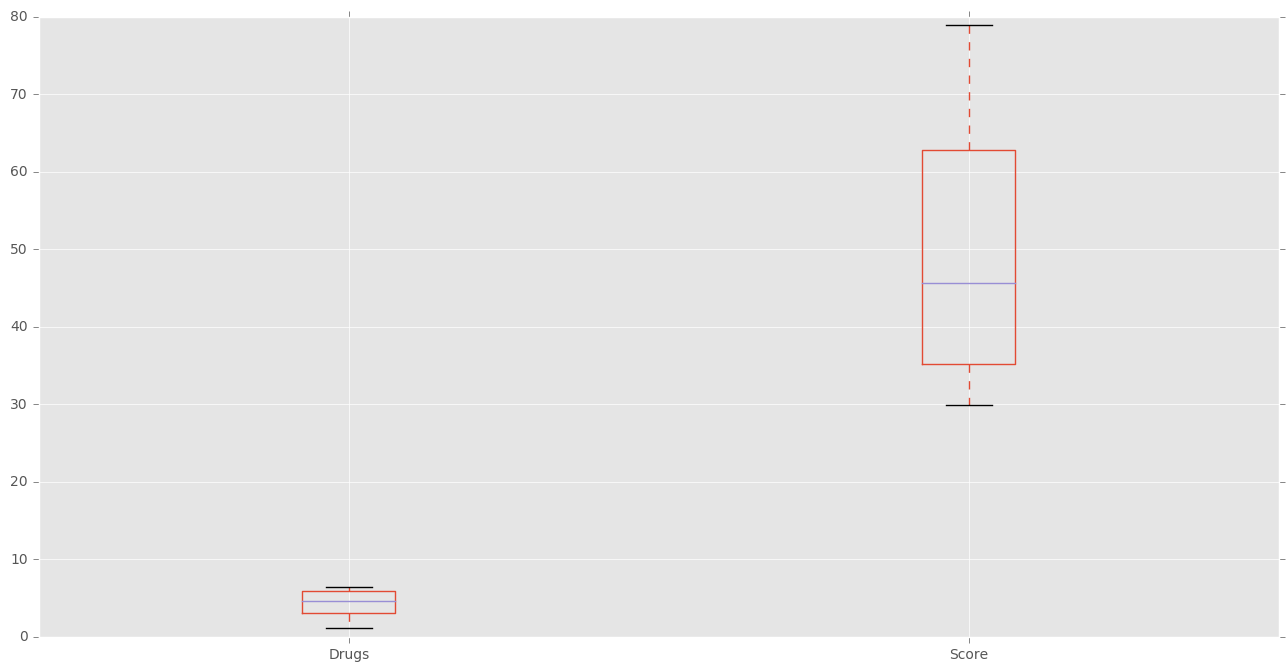

In [125]:
df.plot(kind='box')

In [ ]:
df.Drugs.hist()

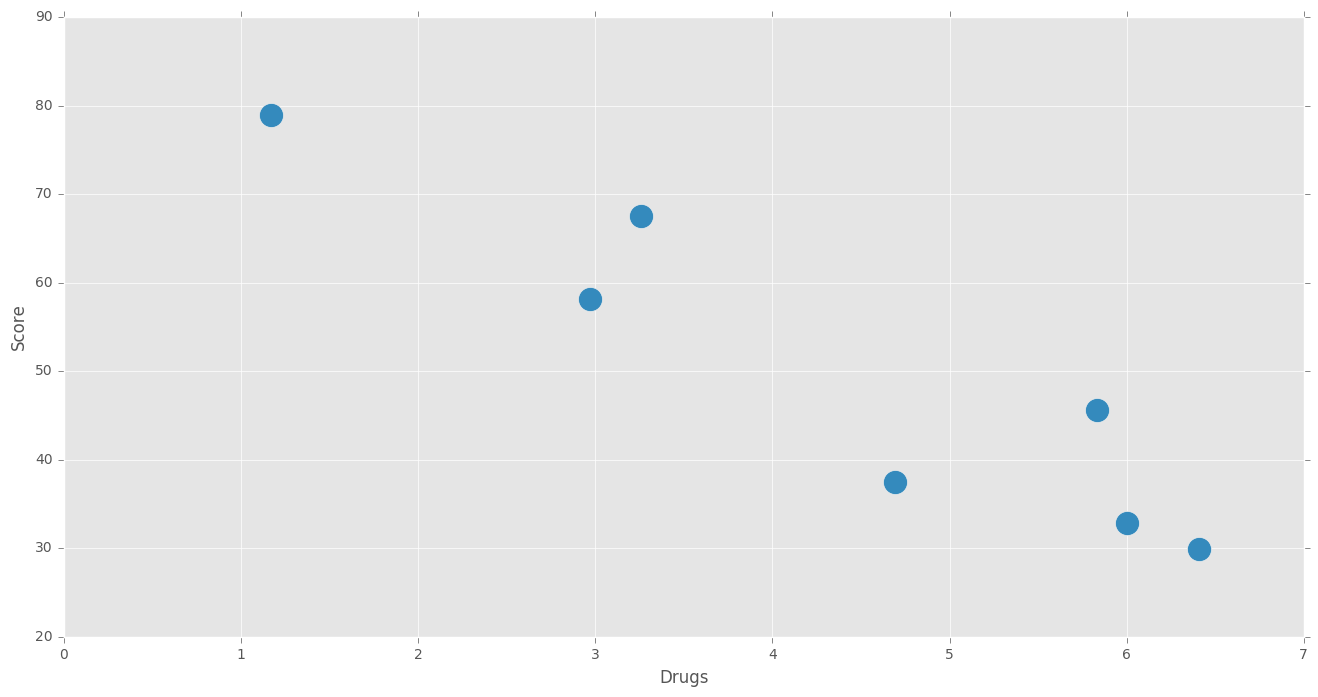

In [127]:
# df.plot(x='Drugs', y='Score')
df.plot(x='Drugs', y='Score', kind='scatter', s=300)

In [128]:
df.corr()

,Drugs,Score
Drugs,1.000000,-0.936928
Score,-0.936928,1.000000


Мы явно видим тенденцию..

### Качество вина

Загрузите [датасет](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) с информацией о характеристиках вина и его качестве.

In [ ]:
## Your code here

* Что из себя представляет объект в этом наборе данных? Сколько их?
* Какие признаки описывают объекты? Сколько их?
* Какой признак является целевым?
* Каковы их области значений?
* Есть ли пропуски?

In [ ]:
## Your code here

Какие признаки больше всего влияют на целевую переменную?

In [ ]:
## Your code here

Создайте новый столбец `quality_cat`, которая будет иметь значение `"good"` если `quality > 5` и `"bad"` - иначе. <br/>

In [ ]:
## Your code here

Нарисуйте гистрограммы признака alcohol в группах с `quality_cat == "good"` и `quality_cat == "bad"`.

In [ ]:
## Your code here

Можете ли вы придумать правило для классификации вина на хорошее и плохое по рисунку выше? Пусть это будет нашей первой моделью)

Напишите функцию `brute_clf_train()` которая бы перебирала пороговое значение по признаку `alcohol` и находило бы "оптимальное" (кстати, что значит оптимальное?)

In [ ]:
## Your code here

Напишите функцию `brute_clf_predict()` которая бы по значению признака `alcohol` и найденному выше порогу говорила какое качество у вина.

А заодно выводила бы количество "ошибок" на текущем наборе данных

Проверим, как обобщается наша модель на другие данные.

* Загрузите другой [датасет](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv)
* Выполните те же панипуляции с признаками
* Используйте нашу простейшую модель для предсказания качества на новых данных

In [ ]:
## Your code here